# Application Note: miniRaman Spectrometer for Analisys of Honey and Syrups

## Lightnovo ApS

### info@lightnovo.com

Copyright 2024 Lightnovo ApS

Licensing: MIT license

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

In [2]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
# Raman spectrum class
class raman_spectrum:
    def __init__(self,fname):
        self.fname = fname
        self.fname0 = self.fname.split('/')[-1]
        self.df = pd.read_csv(fname + '.tsv', sep='\t', header =7)
        self.df.rename(columns={'Tags':'Raman Shift, cm-1', self.df.columns[1]:'Intensity, %'}, inplace = True)
        self.df.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.df.dropna(inplace = True)
        self.normalize()
    
    def normalize(self):
        self.df["Normalized Intensity"] = (self.df["Intensity, %"] - ( min0:=self.df["Intensity, %"].min()) )/(self.df["Intensity, %"].max() - min0) 
    
    
    def plot(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Intensity, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
        
    def plot_n(self, color, label, marker = None):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Normalized Intensity", marker = marker, color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 

In [4]:
dir_path =  "Data"

In [5]:
notebook_dir = os.getcwd()
os.chdir(dir_path)
files = os.listdir()
files.sort(key=lambda x: os.path.getmtime(x))

In [6]:
files

['honey_m1.tsv',
 'honey_m2.tsv',
 'honey_m3.tsv',
 'honey_m4.tsv',
 'honey_m5.tsv',
 'honey_m6.tsv',
 'honey_m7.tsv',
 'honey_m8.tsv',
 'honey_m9.tsv',
 'honey_m10.tsv',
 'maple_syrup_m1.tsv',
 'maple_syrup_m2.tsv',
 'maple_syrup_m3.tsv',
 'maple_syrup_m4.tsv',
 'maple_syrup_m5.tsv',
 'maple_syrup_m6.tsv',
 'maple_syrup_m7.tsv',
 'maple_syrup_m8.tsv',
 'maple_syrup_m9.tsv',
 'maple_syrup_m10.tsv',
 'sukrin_syrup_m1.tsv',
 'sukrin_syrup_m2.tsv',
 'sukrin_syrup_m3.tsv',
 'sukrin_syrup_m4.tsv',
 'sukrin_syrup_m5.tsv',
 'sukrin_syrup_m6.tsv',
 'sukrin_syrup_m7.tsv',
 'sukrin_syrup_m8.tsv',
 'sukrin_syrup_m9.tsv',
 'sukrin_syrup_m10.tsv',
 'sugar_water_m1.tsv',
 'sugar_water_m2.tsv',
 'sugar_water_m3.tsv',
 'sugar_water_m4.tsv',
 'sugar_water_m5.tsv',
 'sugar_water_m6.tsv',
 'sugar_water_m7.tsv',
 'sugar_water_m8.tsv',
 'sugar_water_m9.tsv',
 'sugar_water_m10.tsv',
 'honey_m1_bgCorrected.tsv',
 'honey_m2_bgCorrected.tsv',
 'honey_m3_bgCorrected.tsv',
 'honey_m4_bgCorrected.tsv',
 'honey_m5

In [7]:
f_honey = [f.split('.')[0] for f in files if "honey" in f and "bg" not in f]
f_maple = [f.split('.')[0] for f in files if "maple" in f and "bg" not in f]
f_sukrin = [f.split('.')[0] for f in files if "sukrin" in f and "bg" not in f]
f_sugar =  [f.split('.')[0] for f in files if "sugar" in f and "bg" not in f]

f_honey_bg = [f.split('.')[0] for f in files if "honey" in f and "bg" in f]
f_maple_bg = [f.split('.')[0] for f in files if "maple" in f and "bg" in f]
f_sukrin_bg = [f.split('.')[0] for f in files if "sukrin" in f and "bg" in f]
f_sugar_bg =  [f.split('.')[0] for f in files if "sugar" in f and "bg" in f]

In [8]:
def collect_spectra(f_sample):
    ss = []
    for f in f_sample:
        ss.append(raman_spectrum(f))
    return ss

In [9]:
ss_honey = collect_spectra(f_honey)
ss_maple = collect_spectra(f_maple)
ss_sukrin = collect_spectra(f_sukrin)
ss_sugar = collect_spectra(f_sugar)

ss_honey_bg = collect_spectra(f_honey_bg)
ss_maple_bg = collect_spectra(f_maple_bg)
ss_sukrin_bg = collect_spectra(f_sukrin_bg)
ss_sugar_bg = collect_spectra(f_sugar_bg)


In [10]:
os.chdir(notebook_dir)

In [11]:
cc = ['black','purple', 'violet','blue','lightblue','green','yellow', 'gold','orange','red' ]
ii = np.arange(0,10)

In [12]:
def average_spectra(ss):
    s_av = ss[0]
    s_av.df["Intensity, %"]*= 0

    for s in ss:
        s_av.df["Intensity, %"] += s.df["Intensity, %"]
    s_av.df["Intensity, %"] /= len(ss)
    s_av.normalize()
    return s_av

In [13]:
# honey

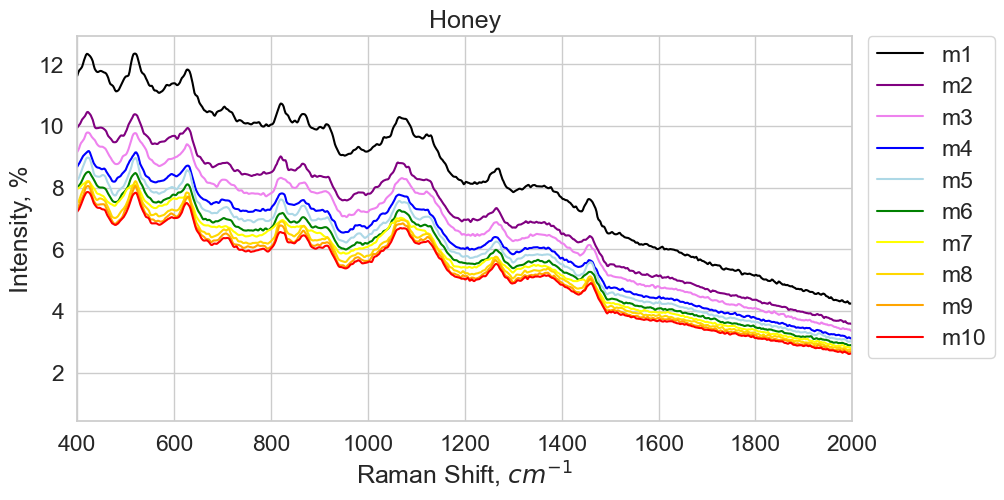

In [14]:
plt.figure(figsize = (10,5))
plt.title("Honey")
for s,c,i in zip(ss_honey,cc,ii):
    s.plot(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("honey.png", dpi = 300, bbox_inches='tight')

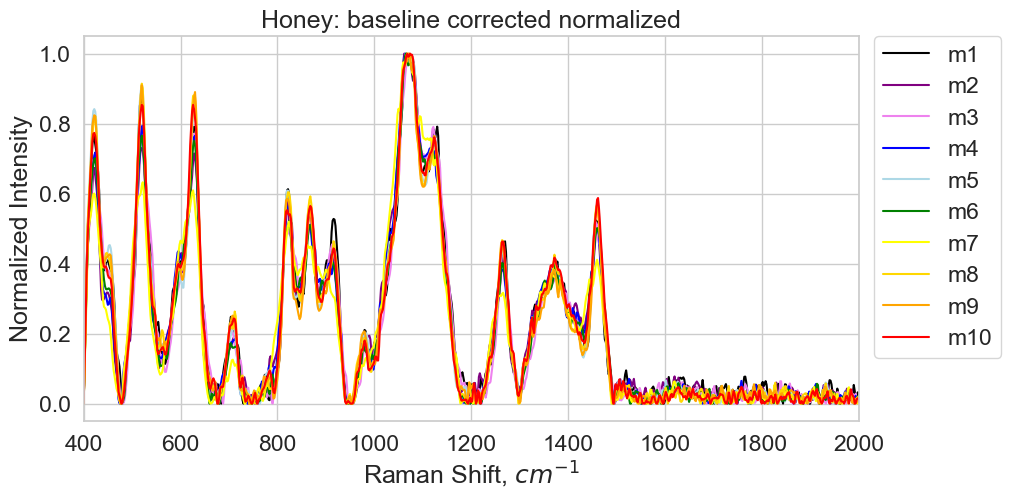

In [15]:
plt.figure(figsize = (10,5))
plt.title("Honey: baseline corrected normalized")
for s,c,i in zip(ss_honey_bg,cc,ii):
    s.plot_n(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("honey_bg.png", dpi = 300, bbox_inches='tight')

In [16]:
s_honey_av = average_spectra(ss_honey)
s_honey_bg_av = average_spectra(ss_honey_bg)

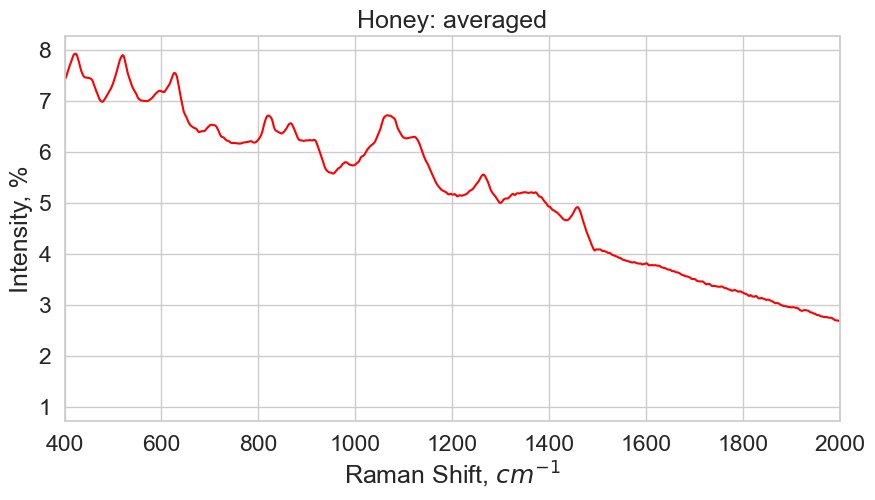

In [17]:
plt.figure(figsize = (10,5))
plt.title("Honey: averaged")
s_honey_av.plot("red", "")
plt.xlim(400,2000)
plt.savefig("honey_averaged.png", dpi = 300, bbox_inches='tight')

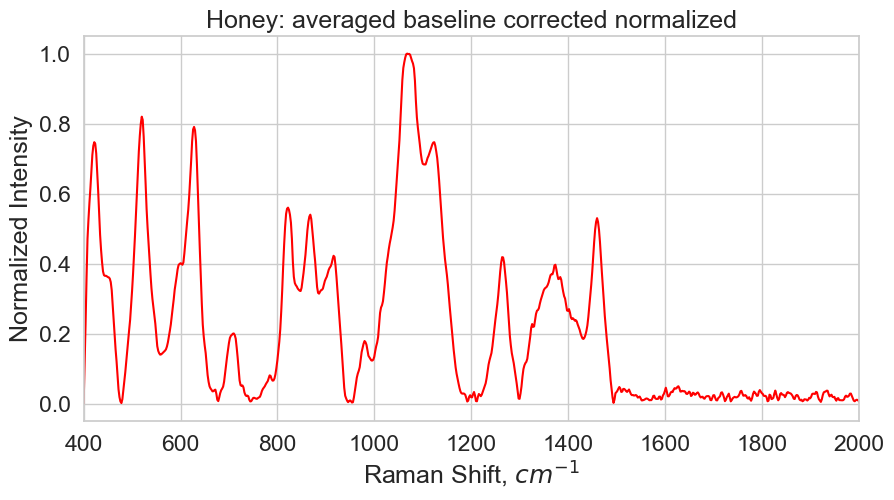

In [18]:
plt.figure(figsize = (10,5))
plt.title("Honey: averaged baseline corrected normalized")
s_honey_bg_av.plot_n("red", "")
plt.xlim(400,2000)
plt.savefig("honey_bg_averaged.png", dpi = 300, bbox_inches='tight')

In [19]:
# maple syrup

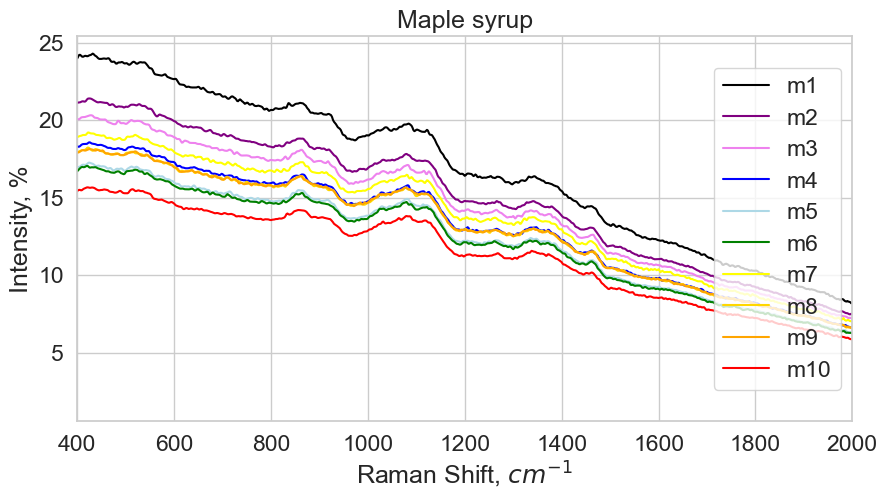

In [20]:
plt.figure(figsize = (10,5))
plt.title("Maple syrup")
for s,c,i in zip(ss_maple,cc,ii):
    s.plot(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(loc = 'right')
plt.savefig("maple_syrup.png", dpi = 300, bbox_inches='tight')

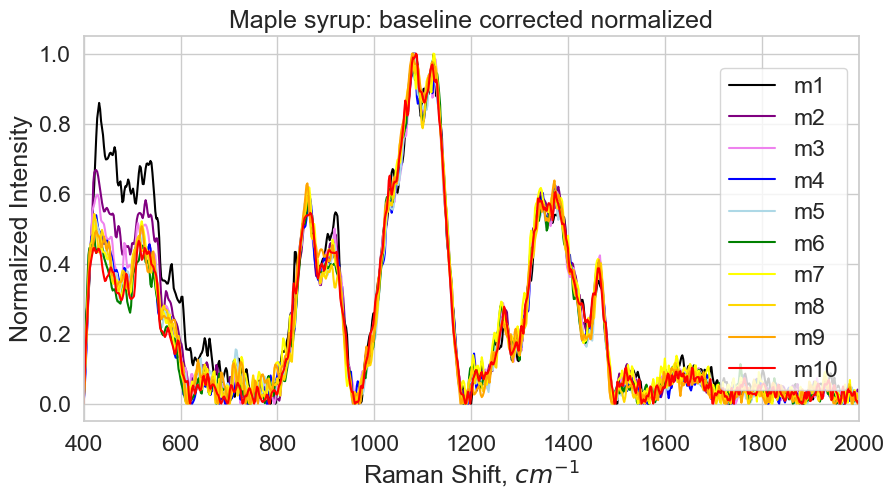

In [21]:
plt.figure(figsize = (10,5))
plt.title("Maple syrup: baseline corrected normalized")
for s,c,i in zip(ss_maple_bg,cc,ii):
    s.plot_n(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(loc = 'right')
plt.savefig("maple_bg.png", dpi = 300, bbox_inches='tight')

In [22]:
s_maple_av = average_spectra(ss_maple)
s_maple_bg_av = average_spectra(ss_maple_bg)

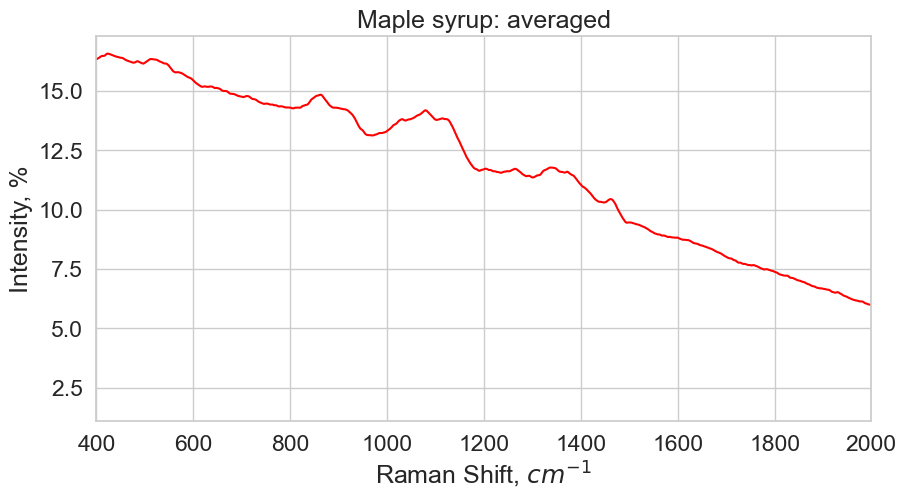

In [23]:
plt.figure(figsize = (10,5))
plt.title("Maple syrup: averaged")
s_maple_av.plot("red", "")
plt.xlim(400,2000)
plt.savefig("maple_averaged.png", dpi = 300, bbox_inches='tight')

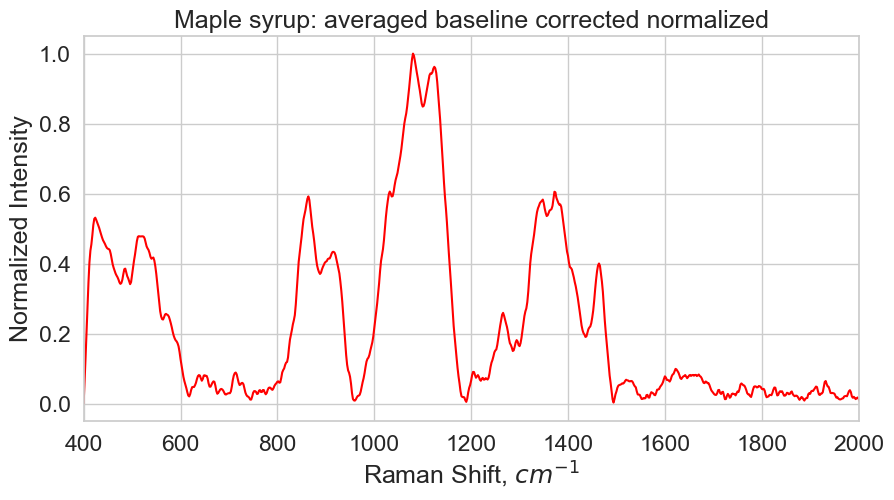

In [24]:
plt.figure(figsize = (10,5))
plt.title("Maple syrup: averaged baseline corrected normalized")
s_maple_bg_av.plot_n("red", "")
plt.xlim(400,2000)
plt.savefig("maple_bg_averaged.png", dpi = 300, bbox_inches='tight')

In [25]:
#sukrin syrup

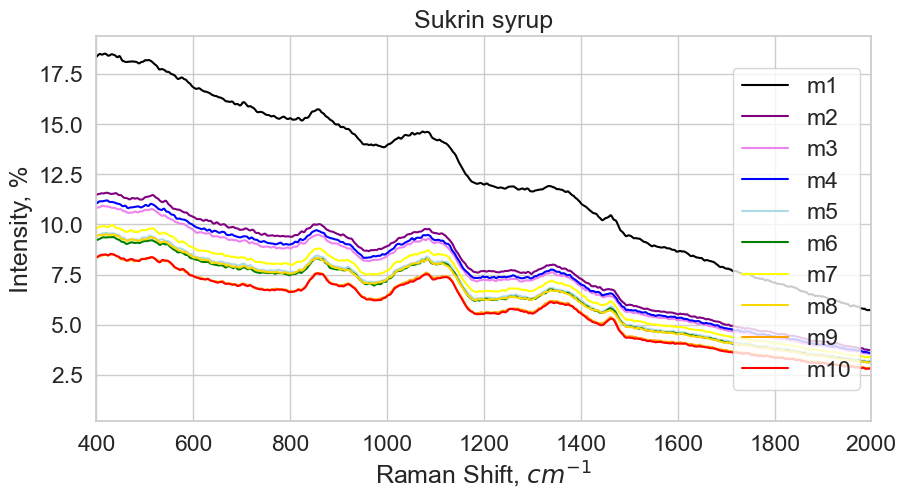

In [26]:
plt.figure(figsize = (10,5))
plt.title("Sukrin syrup")
for s,c,i in zip(ss_sukrin,cc,ii):
    s.plot(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(loc = 'right')
plt.savefig("sukrin_syrup.png", dpi = 300, bbox_inches='tight')

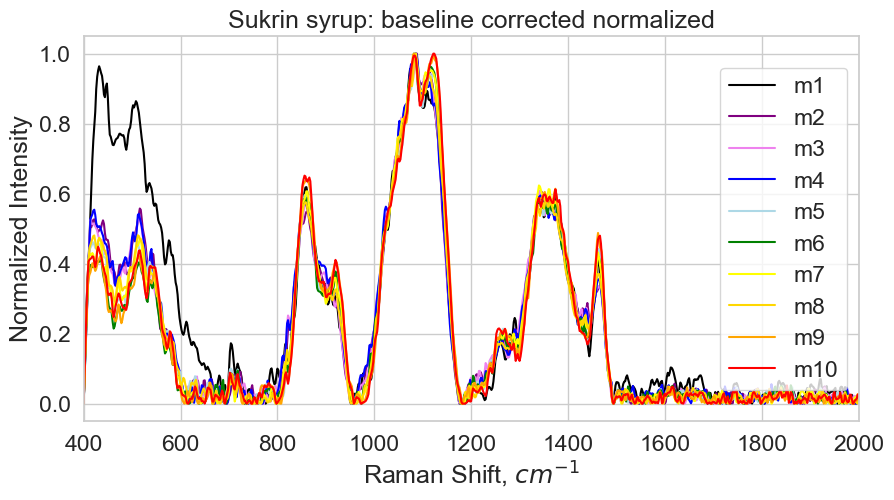

In [27]:
plt.figure(figsize = (10,5))
plt.title("Sukrin syrup: baseline corrected normalized")
for s,c,i in zip(ss_sukrin_bg,cc,ii):
    s.plot_n(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(loc = 'right')
plt.savefig("sukrin_bg.png", dpi = 300, bbox_inches='tight')

In [28]:
s_sukrin_av = average_spectra(ss_sukrin)
s_sukrin_bg_av = average_spectra(ss_sukrin_bg)

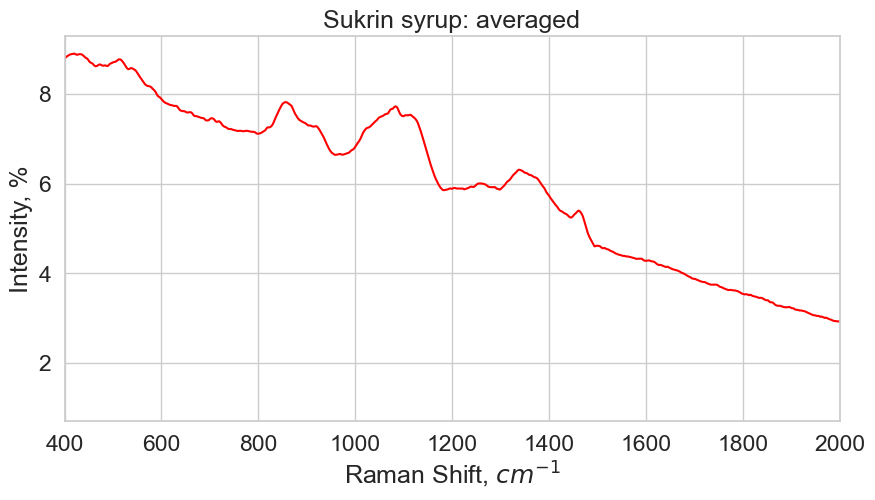

In [29]:
plt.figure(figsize = (10,5))
plt.title("Sukrin syrup: averaged")
s_sukrin_av.plot("red", "")
plt.xlim(400,2000)
plt.savefig("sukrin_averaged.png", dpi = 300, bbox_inches='tight')

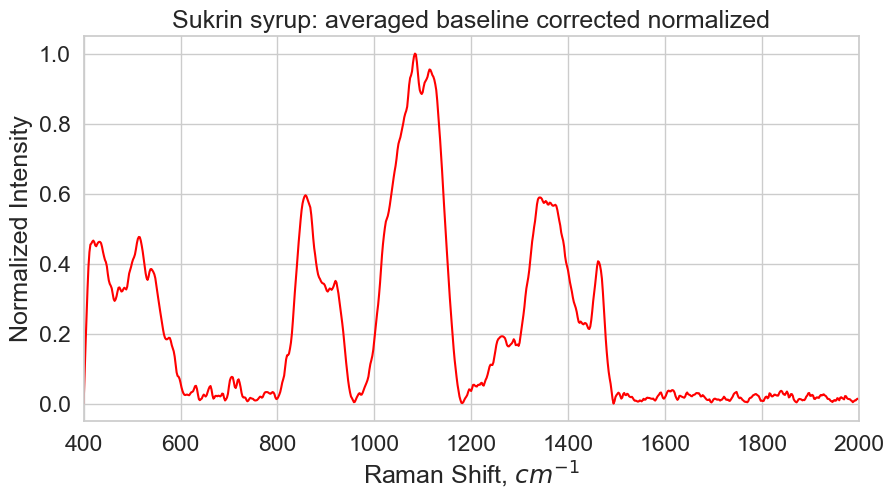

In [30]:
plt.figure(figsize = (10,5))
plt.title("Sukrin syrup: averaged baseline corrected normalized")
s_sukrin_bg_av.plot_n("red", "")
plt.xlim(400,2000)
plt.savefig("sukrin_bg_averaged.png", dpi = 300, bbox_inches='tight')

In [31]:
#sugar in water 2:1

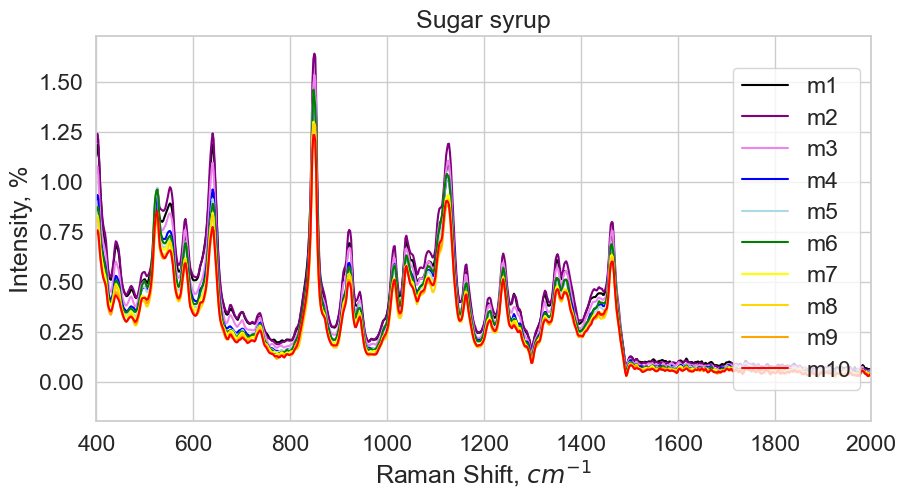

In [32]:
plt.figure(figsize = (10,5))
plt.title("Sugar syrup")
for s,c,i in zip(ss_sugar,cc,ii):
    s.plot(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(loc = 'right')
plt.savefig("sugar.png", dpi = 300, bbox_inches='tight')

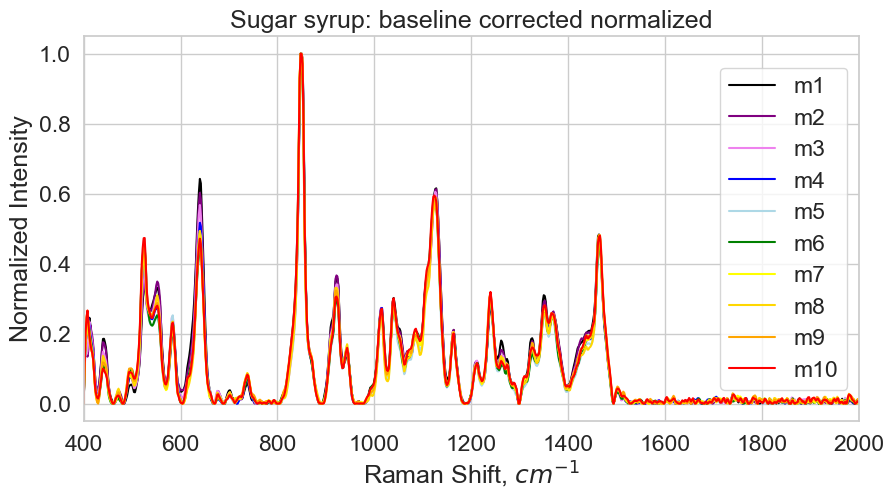

In [33]:
plt.figure(figsize = (10,5))
plt.title("Sugar syrup: baseline corrected normalized")
for s,c,i in zip(ss_sugar_bg,cc,ii):
    s.plot_n(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(loc = 'right')
plt.savefig("sugar_bg.png", dpi = 300, bbox_inches='tight')

In [34]:
s_sugar_av = average_spectra(ss_sugar)
s_sugar_bg_av = average_spectra(ss_sugar_bg)

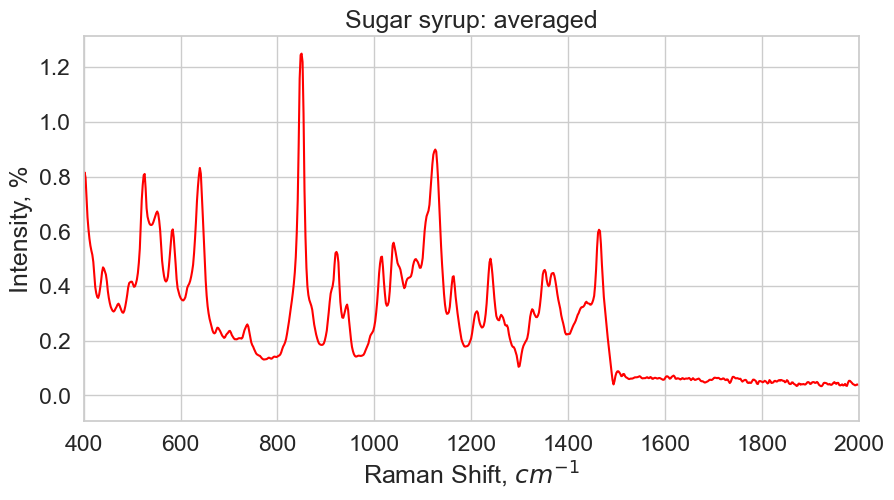

In [35]:
plt.figure(figsize = (10,5))
plt.title("Sugar syrup: averaged")
s_sugar_av.plot("red", "")
plt.xlim(400,2000)
plt.savefig("sugar_averaged.png", dpi = 300, bbox_inches='tight')

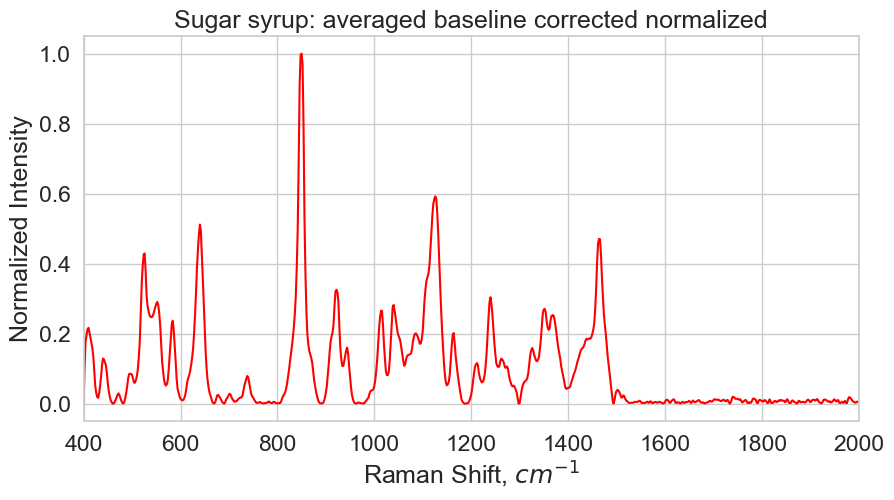

In [36]:
plt.figure(figsize = (10,5))
plt.title("Sugar syrup: averaged baseline corrected normalized")
s_sugar_bg_av.plot_n("red", "")
plt.xlim(400,2000)
plt.savefig("sugar_bg_averaged.png", dpi = 300, bbox_inches='tight')

In [37]:
# all

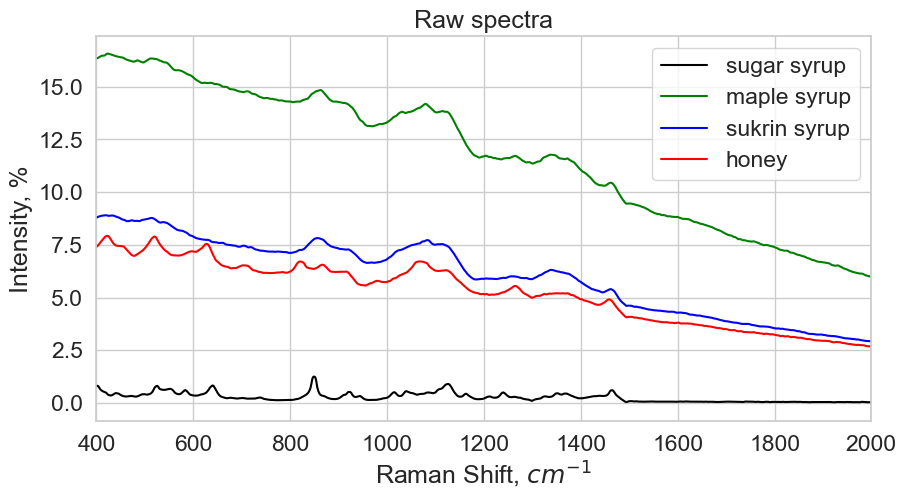

In [38]:
plt.figure(figsize = (10,5))

plt.title("Raw spectra")
s_sugar_av.plot("black", "sugar syrup")
s_maple_av.plot("green", "maple syrup")
s_sukrin_av.plot("blue", "sukrin syrup")
s_honey_av.plot("red", "honey")





plt.xlim(400,2000)
plt.savefig("all.png", dpi = 300, bbox_inches='tight')

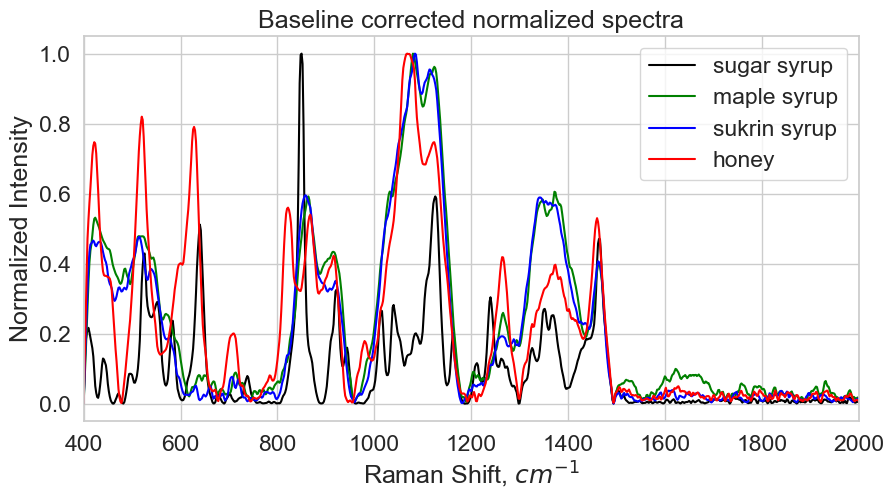

In [39]:
plt.figure(figsize = (10,5))

plt.title("Baseline corrected normalized spectra")
s_sugar_bg_av.plot_n("black", "sugar syrup")
s_maple_bg_av.plot_n("green", "maple syrup")
s_sukrin_bg_av.plot_n("blue", "sukrin syrup")
s_honey_bg_av.plot_n("red", "honey")





plt.xlim(400,2000)
plt.savefig("all_bg.png", dpi = 300, bbox_inches='tight')

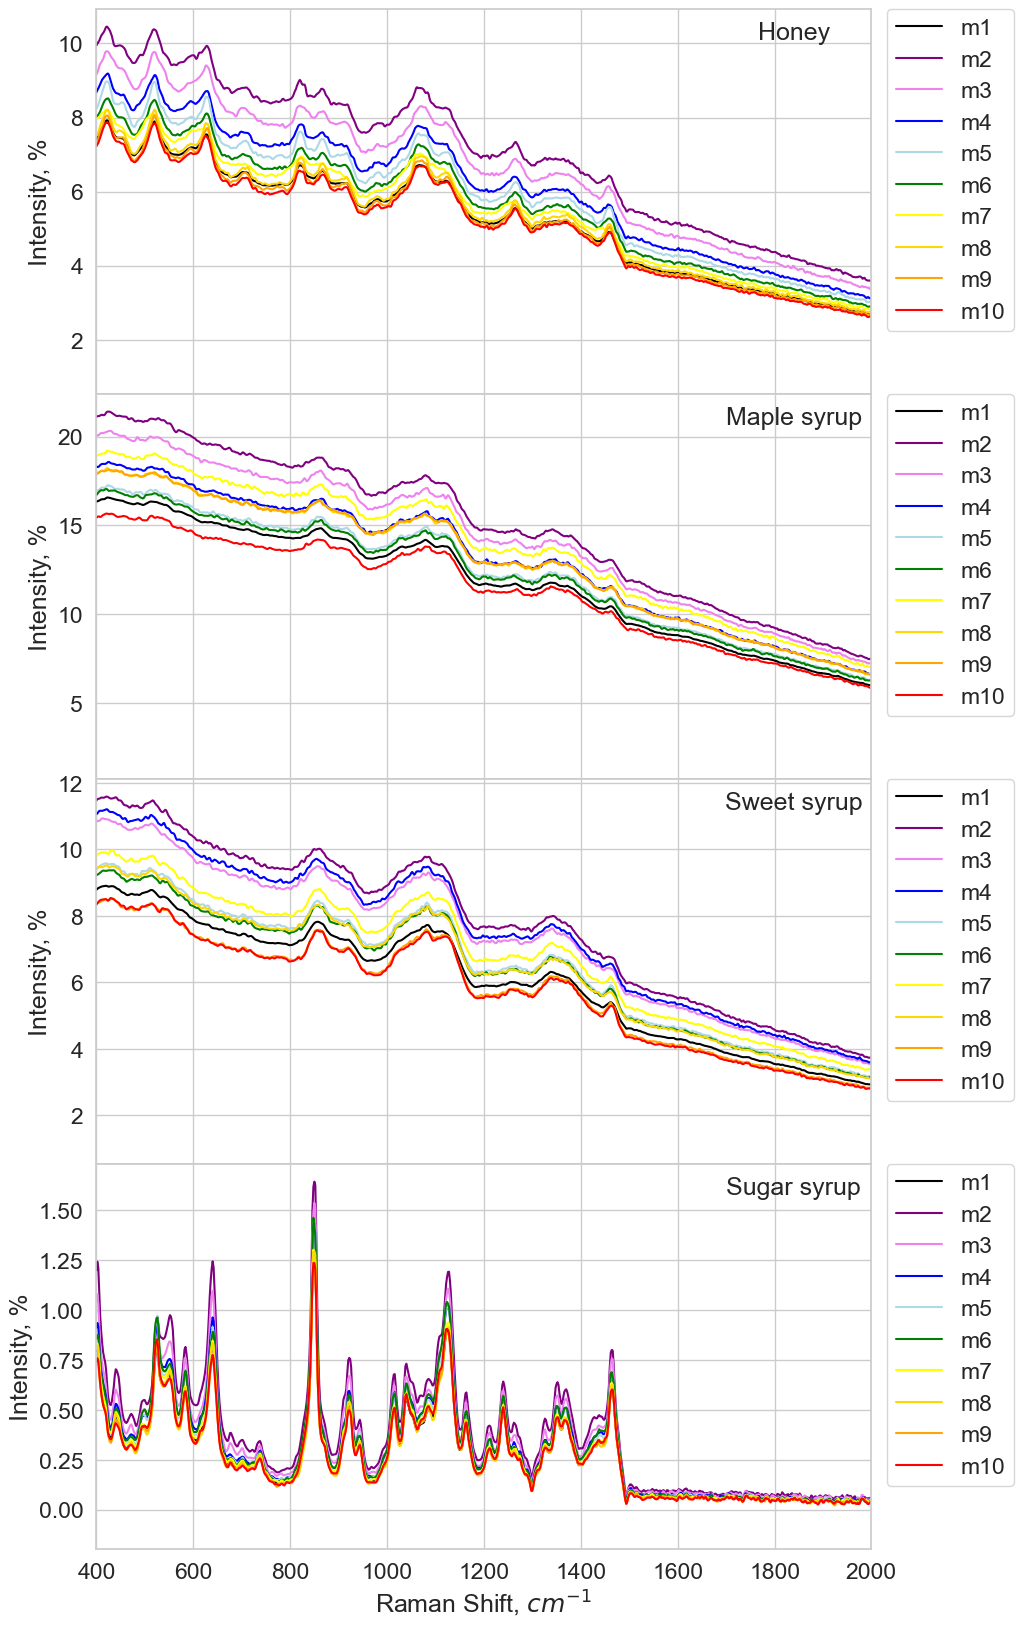

In [40]:
plt.figure(figsize=(10, 20))

g1 = plt.subplot(4, 1, 1)
plt.subplots_adjust(hspace=0)

plt.title("Honey", y=0.9, x=0.9)
for s,c,i in zip(ss_honey,cc,ii):
    s.plot(c,"m" + str(i+1))
    

    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

g1.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity, %")



g2 = plt.subplot(4, 1, 2)

plt.title("Maple syrup",y=0.9, x=0.9)
for s,c,i in zip(ss_maple,cc,ii):
    s.plot(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

g2.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity, %")


g3 = plt.subplot(4, 1, 3)

plt.title("Sweet syrup",y=0.9, x=0.9)
for s,c,i in zip(ss_sukrin,cc,ii):
    s.plot(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

g3.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity, %")


g4 = plt.subplot(4, 1, 4)

plt.title("Sugar syrup",y=0.9, x=0.9)
for s,c,i in zip(ss_sugar,cc,ii):
    s.plot(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Intensity, %")




plt.savefig("all_01.png", dpi = 300, bbox_inches='tight')
plt.savefig("all_01.svg", format='svg', dpi = 300, bbox_inches='tight')

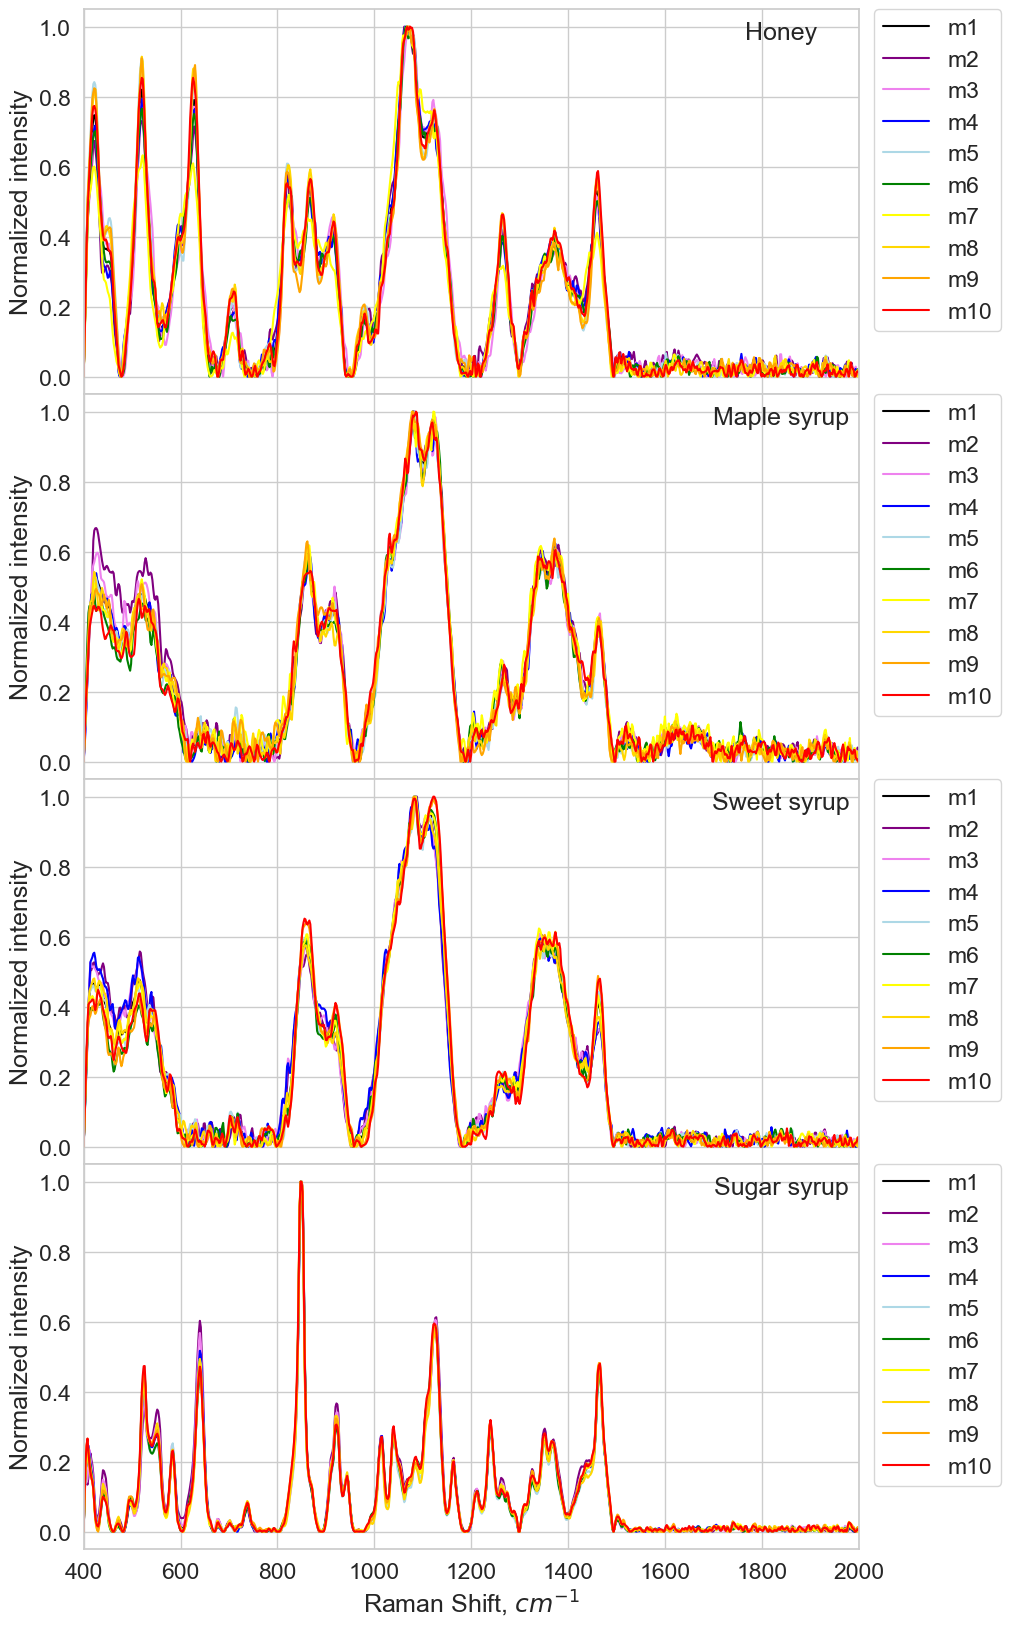

In [41]:
plt.figure(figsize=(10, 20))

g1 = plt.subplot(4, 1, 1)

plt.subplots_adjust(hspace=0)

plt.title("Honey",y=0.9, x=0.9)
for s,c,i in zip(ss_honey_bg,cc,ii):
    s.plot_n(c,"m" + str(i+1))
    

    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

g1.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Normalized intensity")



g2 = plt.subplot(4, 1, 2)

plt.title("Maple syrup",y=0.9, x=0.9)
for s,c,i in zip(ss_maple_bg,cc,ii):
    s.plot_n(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

g2.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Normalized intensity")


g3 = plt.subplot(4, 1, 3)

plt.title("Sweet syrup",y=0.9, x=0.9)
for s,c,i in zip(ss_sukrin_bg,cc,ii):
    s.plot_n(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

g3.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Normalized intensity")


g4 = plt.subplot(4, 1, 4)

plt.title("Sugar syrup",y=0.9, x=0.9)
for s,c,i in zip(ss_sugar_bg,cc,ii):
    s.plot_n(c,"m" + str(i+1))
    
plt.xlim(400,2000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Normalized intensity")




plt.savefig("all_02.png", dpi = 300, bbox_inches='tight')
plt.savefig("all_02.svg", format='svg', dpi = 300, bbox_inches='tight')






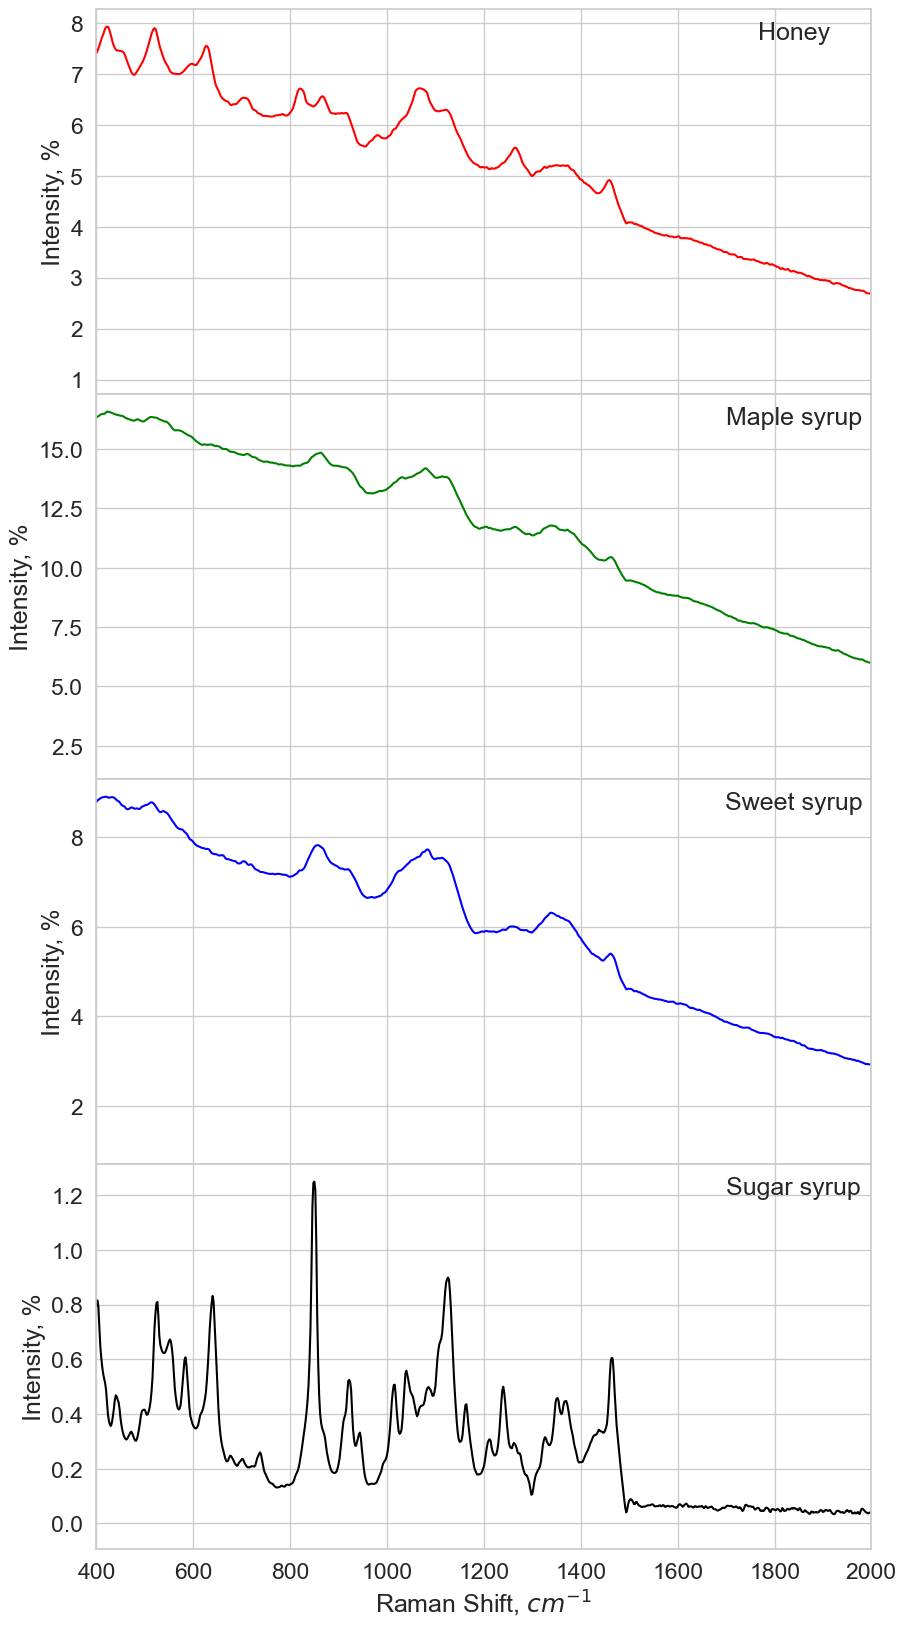

In [42]:
plt.figure(figsize=(10, 20))

g1 = plt.subplot(4, 1, 1)
plt.subplots_adjust(hspace=0)

plt.title("Honey",y=0.9, x=0.9)
s_honey_av.plot("red", "")
    

    
plt.xlim(400,2000)

g1.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity, %")



g2 = plt.subplot(4, 1, 2)

plt.title("Maple syrup",y=0.9, x=0.9)
s_maple_av.plot("green", "")
    
plt.xlim(400,2000)

g2.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity, %")


g3 = plt.subplot(4, 1, 3)

plt.title("Sweet syrup",y=0.9, x=0.9)
s_sukrin_av.plot("blue", "")
    
plt.xlim(400,2000)

g3.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity, %")


g4 = plt.subplot(4, 1, 4)

plt.title("Sugar syrup",y=0.9, x=0.9)
s_sugar_av.plot("black", "")
    
plt.xlim(400,2000)
plt.ylabel("Intensity, %")




plt.savefig("all_03.png", dpi = 300, bbox_inches='tight')
plt.savefig("all_03.svg", format='svg', dpi = 300, bbox_inches='tight')










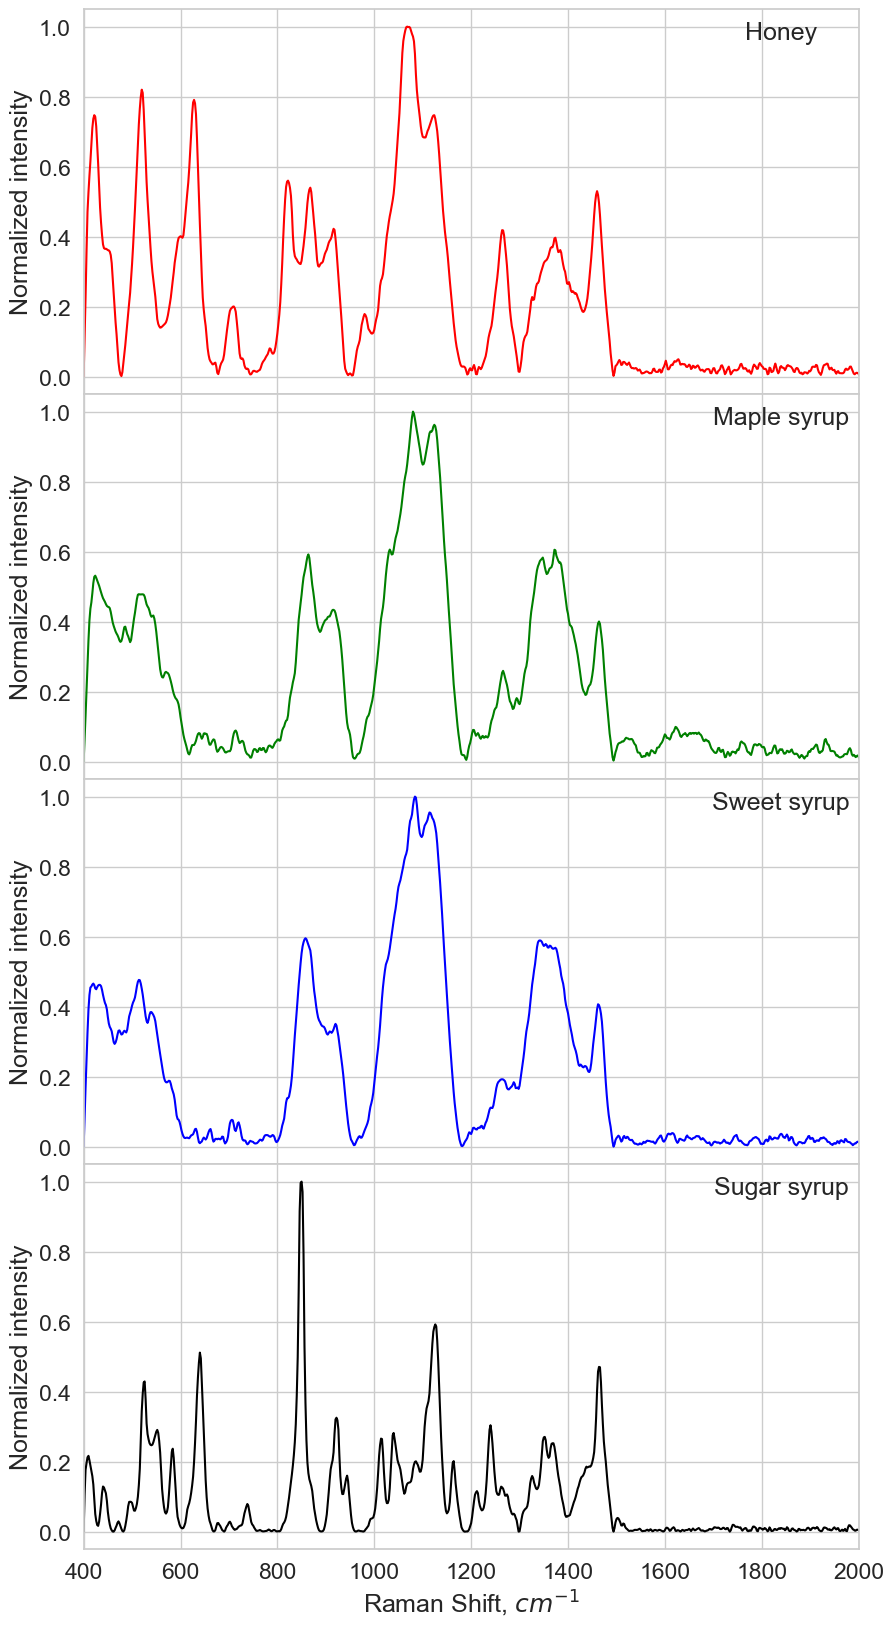

In [43]:
plt.figure(figsize=(10, 20))

g1 = plt.subplot(4, 1, 1)
plt.subplots_adjust(hspace=0)


plt.title("Honey",y=0.9, x=0.9)
s_honey_bg_av.plot_n("red", "")
    

    
plt.xlim(400,2000)

g1.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Normalized intensity")


g2 = plt.subplot(4, 1, 2)

plt.title("Maple syrup",y=0.9, x=0.9)
s_maple_bg_av.plot_n("green", "")
    
plt.xlim(400,2000)

g2.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Normalized intensity")

g3 = plt.subplot(4, 1, 3)

plt.title("Sweet syrup",y=0.9, x=0.9)
s_sukrin_bg_av.plot_n("blue", "")
    
plt.xlim(400,2000)

g3.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Normalized intensity")

g4 = plt.subplot(4, 1, 4)

plt.title("Sugar syrup",y=0.9, x=0.9)
s_sugar_bg_av.plot_n("black", "")
    
plt.xlim(400,2000)
plt.ylabel("Normalized intensity")



plt.savefig("all_04.png", dpi = 300, bbox_inches='tight')
plt.savefig("all_04.svg", format='svg', dpi = 300, bbox_inches='tight')

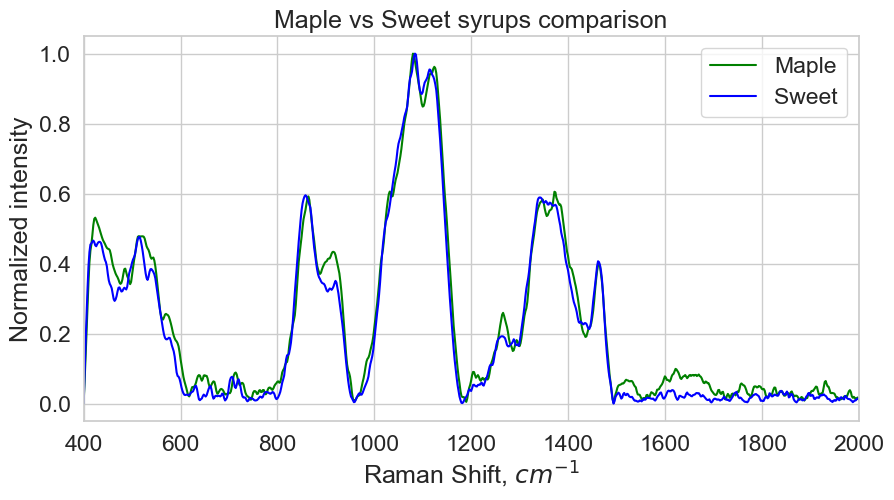

In [44]:
plt.figure(figsize=(10, 5))


    

    


plt.title("Maple vs Sweet syrups comparison")
s_maple_bg_av.plot_n("green", "Maple")
    



s_sukrin_bg_av.plot_n("blue", "Sweet")
    
plt.xlim(400,2000)
plt.legend()
plt.ylabel("Normalized intensity")






plt.savefig("comparison.png", dpi = 300, bbox_inches='tight')

In [45]:
difference_01 = s_maple_bg_av.df["Normalized Intensity"] - s_sukrin_bg_av.df["Normalized Intensity"]
x_01 = s_maple_bg_av.df["Raman Shift, cm-1"]

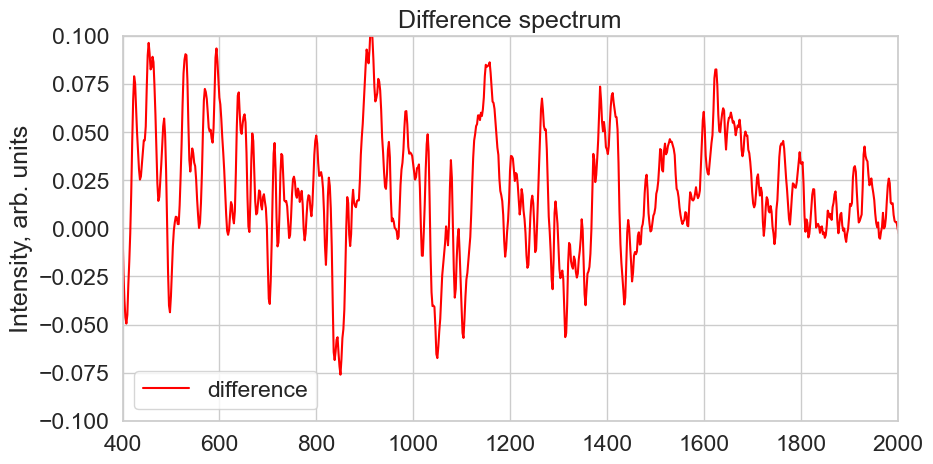

In [46]:
plt.figure(figsize=(10, 5))

plt.title("Difference spectrum")
plt.plot(x_01,difference_01, color = "red", label = "difference")



    
plt.xlim(400,2000)
plt.legend()
plt.ylabel("Intensity, arb. units")
plt.ylim([-0.1,0.1])



plt.savefig("comparison_difference.png", dpi = 300, bbox_inches='tight')

In [47]:
lX=[]
lY=[]

In [48]:
ss_honey_bg[0].df['Raman Shift, cm-1'].loc[800]

2000

In [49]:
for i in range(0,10):
    lX.append(ss_honey_bg[i].df['Normalized Intensity'][0:800].values.tolist())
    lY.append("Honey")
for i in range(0,10):
    lX.append(ss_maple_bg[i].df['Normalized Intensity'][0:800].values.tolist())
    lY.append("Maple Syrup")
for i in range(0,10):
    lX.append(ss_sukrin_bg[i].df['Normalized Intensity'][0:800].values.tolist())
    lY.append("Sweet Syrup")
for i in range(0,10):
    lX.append(ss_sugar_bg[i].df['Normalized Intensity'][0:800].values.tolist())
    lY.append("Sugar Syrup")

In [50]:
wn_array = ss_honey_bg[0].df['Raman Shift, cm-1'][0:800]

In [51]:
X = pd.DataFrame(lX)

In [52]:
y = pd.DataFrame(lY)

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [54]:
pca = PCA(n_components=10)

In [55]:
X=X.fillna(0)

In [56]:
X = StandardScaler().fit_transform(X)

In [57]:
pc = pca.fit_transform(X)

In [58]:
df_pc = pd.DataFrame(data = pc, columns = ['PC 1', 'PC 2','PC 3','PC 4', 'PC 5','PC 6','PC 7', 'PC 8','PC 8','PC 10'])

In [59]:
df_pc = pd.concat([df_pc, y.reset_index()], axis = 1)
df_pc.rename(columns={0: "Label"}, inplace = True)
df_pc.drop(columns = ["index"], inplace = True)

In [60]:
df_pc

PC 1       PC 2       PC 3       PC 4       PC 5       PC 6  \
0   -4.807959  21.952512  -0.458141  -0.053282   0.291796   0.307702   
1   -8.267868  19.714748   5.764798   2.924191   6.554316  -4.815548   
2   -4.847612  20.153366   2.643425 -11.874440   2.185504  17.183739   
3   -5.544602  22.040553  -0.940659   5.098856  -0.440819  -3.033085   
4   -4.544950  22.688272  -0.941471  -2.032971  -2.817308  -3.497767   
5   -1.814654  21.177749  -1.528385  -2.146584   4.255207  -0.734185   
6   -0.776608  16.874695  -6.838456  13.131990   8.795975   0.775139   
7   -5.196691  23.812933  -2.364834  -1.590610  -4.549197  -0.075739   
8   -4.563035  23.378437   0.157838   1.052539  -7.019152   0.932269   
9   -2.394361  24.891822  -1.788479  -2.517675  -2.864413  -4.652272   
10 -20.944169  -8.544443   9.592642   0.266750  -0.183182  -0.372324   
11 -25.138187  -8.708635  12.280810  -9.173482   8.652153  -1.159776   
12 -23.091628  -8.373485  13.456213  -5.867027   2.408597  -7.342144   
13 -17.356360  -7.871458   7.566931  -3.156736   1.270092 -10.191991   
14 -17.441985  -7.063226   7.008516  -1.429397  -4.294909  -1.001880   
15 -18.454897  -9.366873   9.286804   8.811738  -5.999704   3.022304   
16 -26.046755  -8.346924  18.938510   7.857030  -7.481183   5.965002   
17 -16.625361  -9.695995   4.408126   7.231234  -5.593828   5.370318   
18 -20.106921  -6.806685   3.128906   5.281679  -4.732326  -1.763044   
19 -18.657814 -10.486898   8.112364  -5.203381  14.107102   4.566802   
20  -6.948733  -8.756358 -12.640902  -0.916967  -0.365792   0.175632   
21  -8.705690  -8.848575 -11.844568   7.527934   4.125051   2.878931   
22  -7.889774  -8.974864 -13.558716   6.642261   5.319543  -0.464934   
23  -9.218362  -8.929265 -13.426721   4.800998   5.801553   0.336398   
24  -6.890907  -8.372176 -11.114353  -4.993030  -2.774011   0.416644   
25  -5.898829  -8.895203 -11.438772  -2.921283  -2.978255  -0.652271   
26  -6.074536  -9.184652 -13.931831  -3.035277  -1.087073  -1.077753   
27  -4.612219  -8.854610 -15.150635   0.678598   2.509358   1.452739   
28  -4.548773  -8.358658 -11.003463  -8.624070  -6.451452  -0.318575   
29  -5.036347  -8.125914 -12.386459  -7.361956  -7.337525  -1.289804   
30  31.177804  -4.429088   3.945865   0.096579   0.033908  -0.053803   
31  30.767818  -4.879693   3.083088  -1.030951   0.514725   0.207540   
32  31.069806  -4.640596   4.152727  -0.249640  -0.550857   0.393272   
33  31.636080  -4.599324   3.520973   0.584629  -0.074409   0.251036   
34  32.405745  -4.199102   3.931100   0.591869  -0.504846  -0.179367   
35  31.703759  -4.236658   3.209703   0.839718   0.634822  -0.295124   
36  31.179328  -4.402842   4.316528   0.835211  -0.077012  -0.380569   
37  31.748173  -4.576573   4.333514  -0.289724  -0.699890  -0.385798   
38  30.302959  -4.060124   4.704357   0.326793   0.545104  -0.544207   
39  30.455114  -4.096191   3.813103  -0.112113   0.872335   0.046494   

         PC 7       PC 8       PC 8      PC 10        Label  
0    0.227028   0.049866   0.157105   0.106358        Honey  
1    4.166336  -2.296467  -1.167994   4.215474        Honey  
2   -1.821476   2.862449  -5.741594  -0.719452        Honey  
3    2.527144  -0.491210   2.797937   2.501788        Honey  
4   -1.889175  -1.967346  -1.189846  -4.640735        Honey  
5    2.488208   1.602062   3.572536  -0.009757        Honey  
6    8.070981   8.665503   0.076042   1.562753        Honey  
7   -4.438405  -2.785079   1.474294  -1.011084        Honey  
8   -6.109663  -2.394517   0.693106  -2.572629        Honey  
9   -0.705981  -1.945926   0.547956   0.725893        Honey  
10  -0.422584   1.119013   0.236263  -0.155036  Maple Syrup  
11  -6.202237  -2.492898   2.444049  12.593294  Maple Syrup  
12  -2.239348  -1.738129  -1.207491  -5.539663  Maple Syrup  
13  -0.817465   3.096637  -3.096807  -3.802790  Maple Syrup  
14   4.333912   3.787366  -8.710310  -1.037487  Maple Syrup  
15  -0.896074  -1.474548  11.150197  -1.452590  Maple Syrup  
16

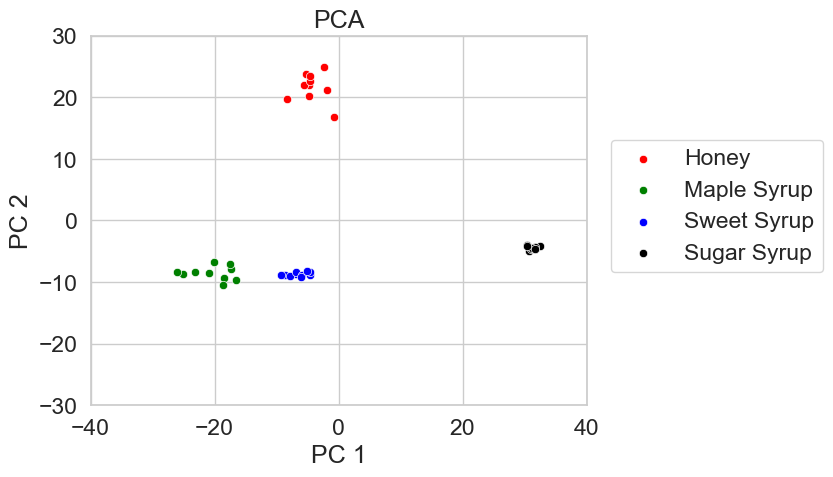

In [61]:
plt.title("PCA")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Honey"], x = "PC 1", y = 'PC 2', color = 'red', label = "Honey")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Maple Syrup"], x = "PC 1", y = 'PC 2', color = 'green', label = "Maple Syrup")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Sweet Syrup"], x = "PC 1", y = 'PC 2', color = 'blue', label = "Sweet Syrup")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Sugar Syrup"], x = "PC 1", y = 'PC 2', color = 'black', label = "Sugar Syrup")


plt.legend(bbox_to_anchor=(1.5, 0.75))
plt.xlim(-40,40)
plt.ylim(-30,30)
plt.savefig("PCA_1_2.png", dpi = 300, bbox_inches='tight')
plt.savefig("PCA_1_2.svg", format='svg', dpi = 300, bbox_inches='tight')

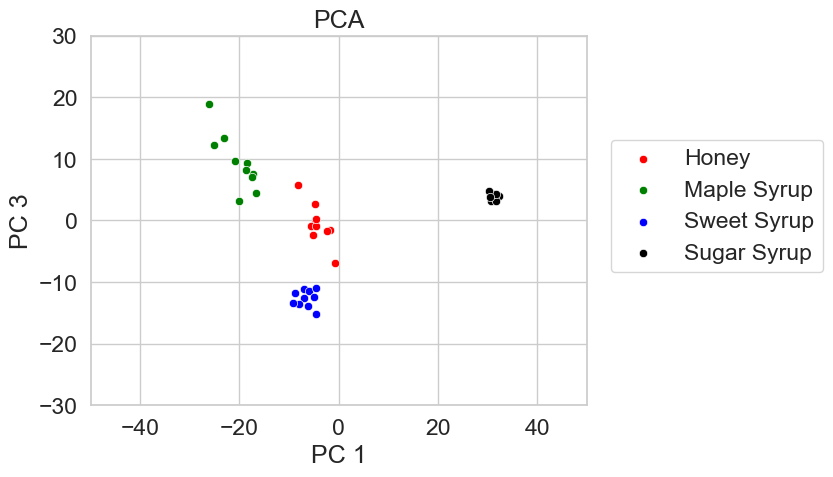

In [62]:
plt.title("PCA")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Honey"], x = "PC 1", y = 'PC 3', color = 'red', label = "Honey")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Maple Syrup"], x = "PC 1", y = 'PC 3', color = 'green', label = "Maple Syrup")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Sweet Syrup"], x = "PC 1", y = 'PC 3', color = 'blue', label = "Sweet Syrup")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Sugar Syrup"], x = "PC 1", y = 'PC 3', color = 'black', label = "Sugar Syrup")


plt.legend(bbox_to_anchor=(1.5, 0.75))
plt.xlim(-50,50)
plt.ylim(-30,30)
plt.savefig("PCA_1_3.png", dpi = 300, bbox_inches='tight')
plt.savefig("PCA_1_3.svg", format='svg', dpi = 300, bbox_inches='tight')

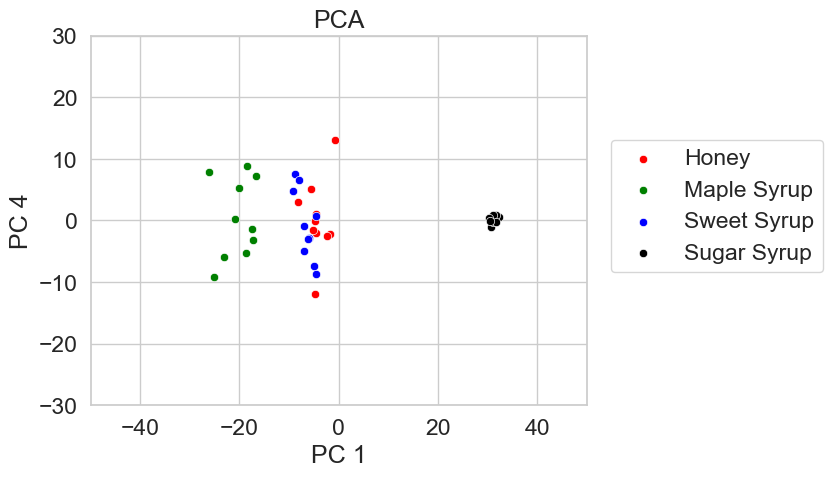

In [63]:
plt.title("PCA")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Honey"], x = "PC 1", y = 'PC 4', color = 'red', label = "Honey")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Maple Syrup"], x = "PC 1", y = 'PC 4', color = 'green', label = "Maple Syrup")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Sweet Syrup"], x = "PC 1", y = 'PC 4', color = 'blue', label = "Sweet Syrup")
sns.scatterplot(data = df_pc[df_pc["Label"] == "Sugar Syrup"], x = "PC 1", y = 'PC 4', color = 'black', label = "Sugar Syrup")


plt.legend(bbox_to_anchor=(1.5, 0.75))
plt.xlim(-50,50)
plt.ylim(-30,30)
plt.savefig("PCA_1_4.png", dpi = 300, bbox_inches='tight')

In [64]:
pca.explained_variance_ratio_

array([0.45952393, 0.20127215, 0.09192553, 0.03261999, 0.02738775,
       0.01989712, 0.01795826, 0.01522285, 0.01380298, 0.01113114])

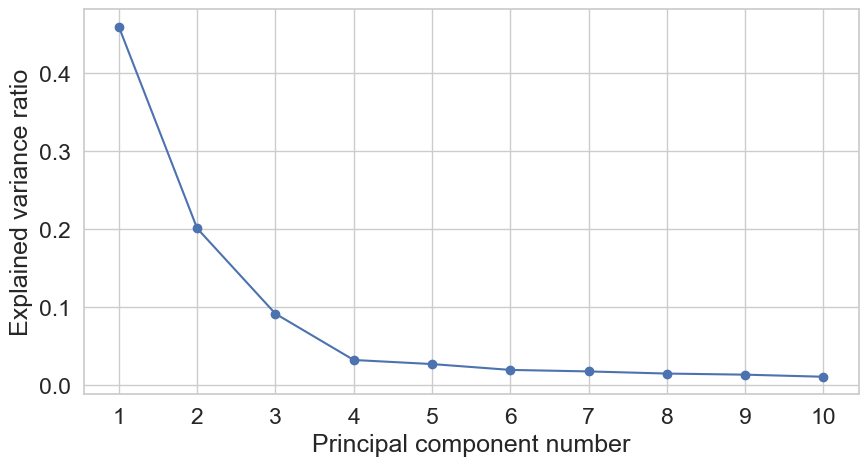

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1,11),pca.explained_variance_ratio_, marker = 'o')
plt.xlabel("Principal component number")
plt.ylabel("Explained variance ratio")

xticks = np.arange(1, 11, 1)
plt.xticks(xticks);
plt.savefig("PCA_explained_variance", dpi = 300, bbox_inches='tight')
plt.savefig("PCA_explained_variance.svg", format='svg', dpi = 300, bbox_inches='tight')



In [66]:
pca.explained_variance_ratio_

array([0.45952393, 0.20127215, 0.09192553, 0.03261999, 0.02738775,
       0.01989712, 0.01795826, 0.01522285, 0.01380298, 0.01113114])

In [67]:
df_vr = pd.DataFrame(pca.explained_variance_ratio_)
df_vr["Per cent"] = df_vr[0]*100
df_vr.to_excel("01.xlsx")

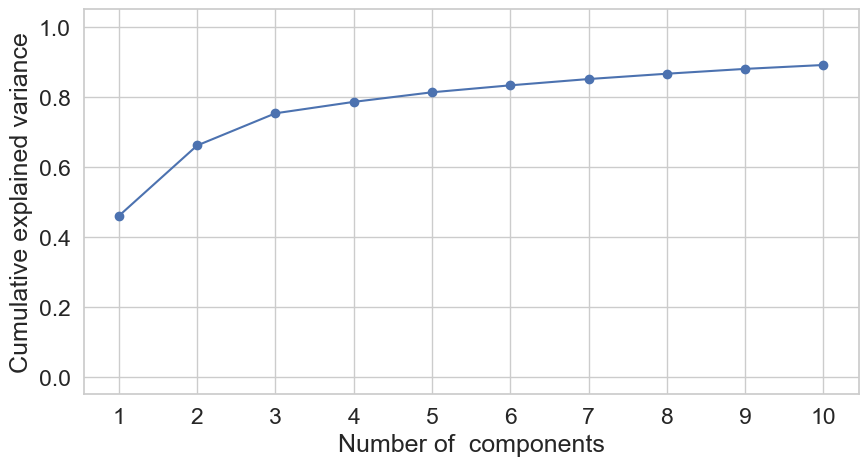

In [68]:
y1 = pca.explained_variance_ratio_
y2 = y1*0

for i in range(0,len(y1)):
    y2[i] = sum(y1[0:i+1])


plt.figure(figsize=(10, 5))
plt.plot(np.arange(1,11),y2, marker = 'o')
plt.xlabel("Number of  components")
plt.ylabel("Cumulative explained variance")

xticks = np.arange(1, 11, 1)
plt.xticks(xticks);
plt.ylim(-0.05,1.05)
plt.savefig("PCA_cumulative_explained_variance", dpi = 300, bbox_inches='tight')
plt.savefig("PCA_cumuulative_explained_variance.svg", format='svg', dpi = 300, bbox_inches='tight')





In [69]:
y2

array([0.45952393, 0.66079608, 0.75272161, 0.7853416 , 0.81272935,
       0.83262647, 0.85058473, 0.86580758, 0.87961056, 0.89074171])

In [70]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [71]:
loadings

array([[ 3.42283454e-01,  6.63508938e-02, -1.68928447e-01, ...,
        -1.60766044e-01, -1.93418764e-02, -2.27601253e-04],
       [ 6.46528712e-01,  5.93030786e-01, -2.33238630e-01, ...,
        -6.93321316e-02,  2.23782426e-01,  7.36639246e-02],
       [ 2.86494338e-01,  8.08014982e-01, -2.78575762e-01, ...,
        -1.08719374e-01,  2.02869024e-01,  1.96234114e-03],
       ...,
       [-5.31468927e-01,  2.23868410e-03,  1.04079189e-01, ...,
         1.51888083e-01, -4.54943186e-02, -3.42443922e-02],
       [-5.10844728e-01, -6.09957423e-02,  5.05290706e-02, ...,
         2.56290319e-02,  7.38195394e-02, -5.38568616e-02],
       [-4.85898349e-01, -1.47122646e-01,  7.04668149e-02, ...,
        -2.43206574e-01,  1.51044813e-01,  2.37233240e-01]])

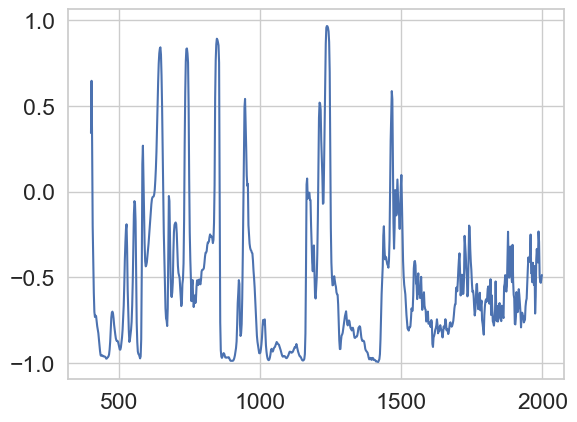

In [72]:
plt.plot(wn_array,loadings.T[0])

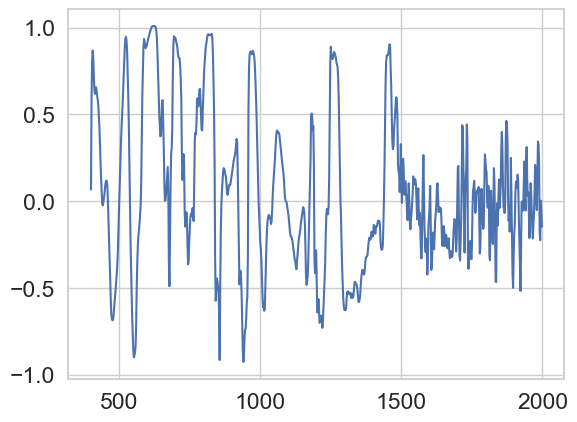

In [73]:
plt.plot(wn_array,loadings.T[1])

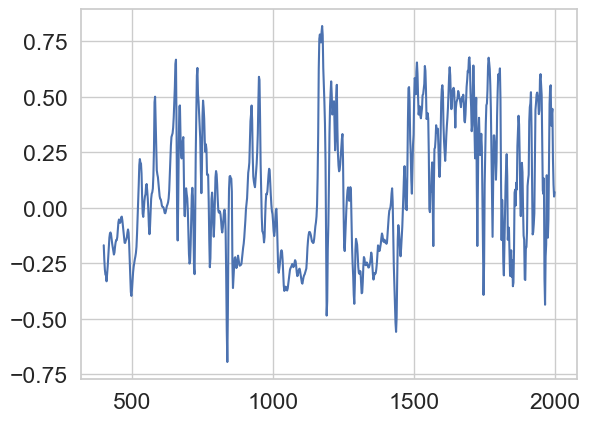

In [74]:
plt.plot(wn_array,loadings.T[2])

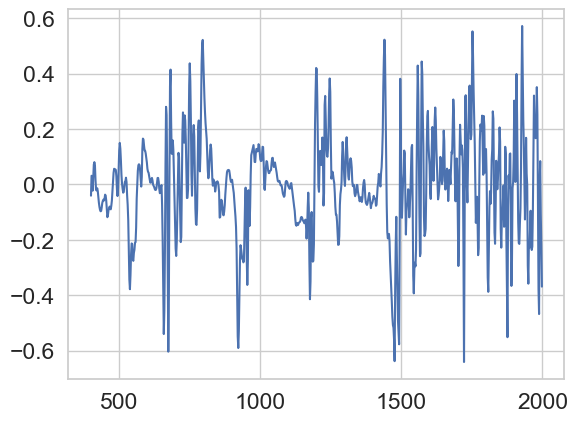

In [75]:
plt.plot(wn_array,loadings.T[3])

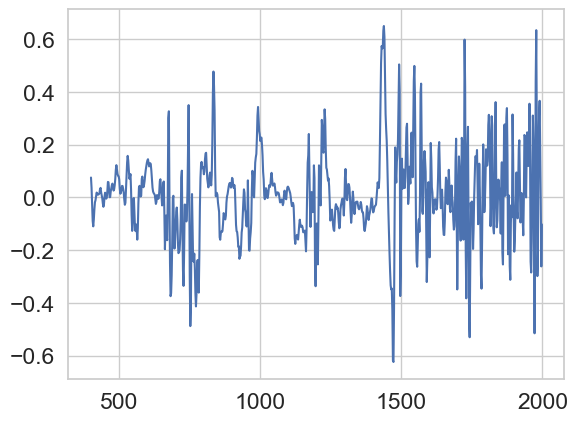

In [76]:
plt.plot(wn_array,loadings.T[4])

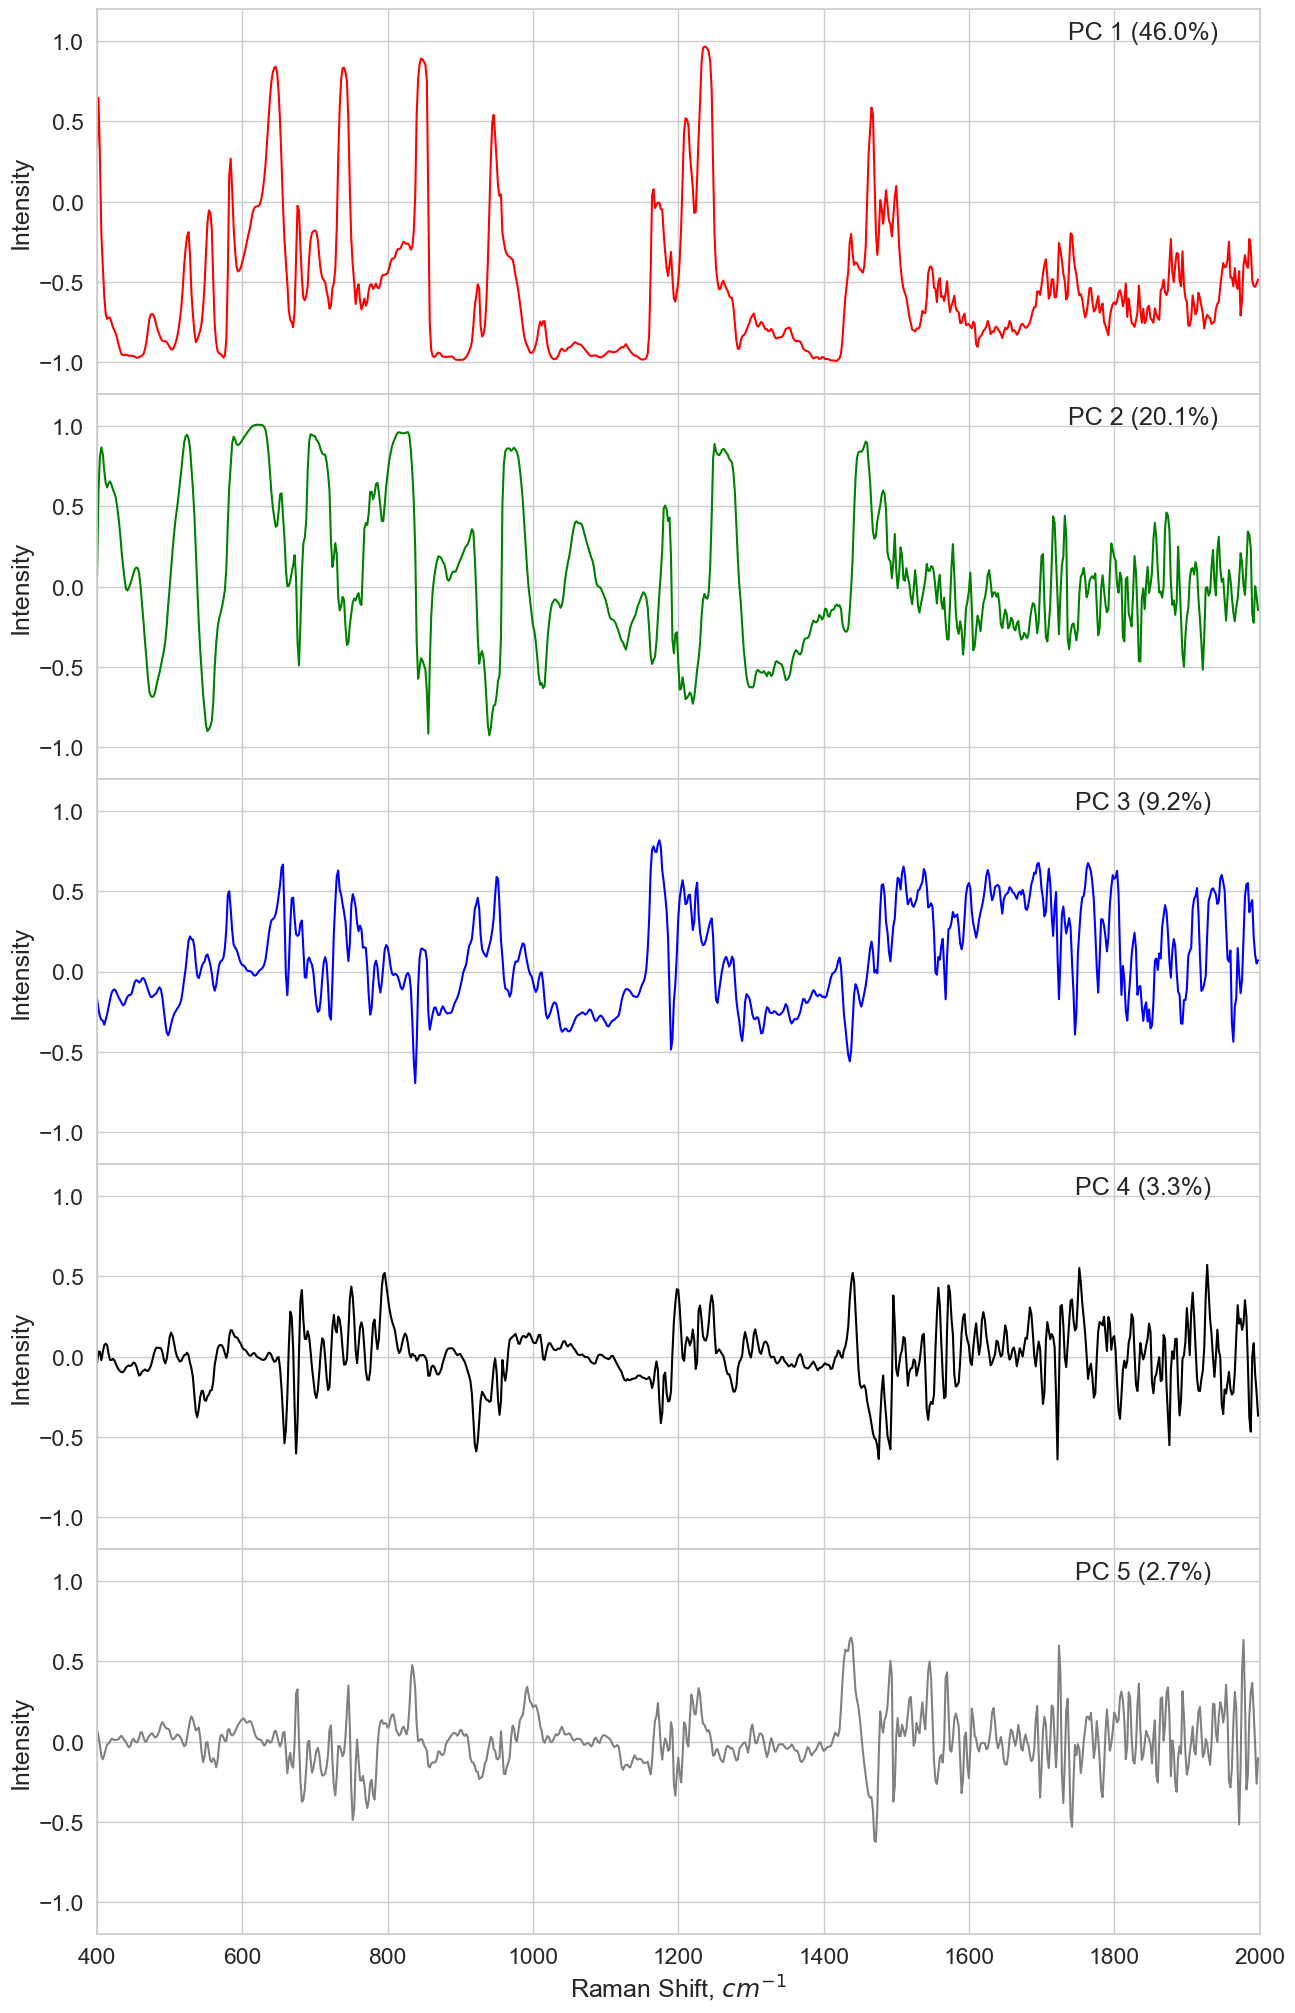

In [77]:
plt.figure(figsize=(15, 25))

g1 = plt.subplot(5, 1, 1)
plt.subplots_adjust(hspace=0)


plt.title("PC 1 (46.0%)",y=0.9, x=0.9)
plt.plot(wn_array,loadings.T[0], color = 'red')
    

    
plt.xlim(400,2000)
plt.ylim(-1.2,1.2)

g1.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity")


g2 = plt.subplot(5, 1, 2)

plt.title("PC 2 (20.1%)",y=0.9, x=0.9)
plt.plot(wn_array,loadings.T[1], color = 'green')
    
plt.xlim(400,2000)
plt.ylim(-1.2,1.2)

g2.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity")

g3 = plt.subplot(5, 1, 3)

plt.title("PC 3 (9.2%)",y=0.9, x=0.9)
plt.plot(wn_array,loadings.T[2], color = 'blue')
    
plt.xlim(400,2000)
plt.ylim(-1.2,1.2)

g3.set(xticklabels=[]) 
plt.xlabel("")
plt.ylabel("Intensity")

g4 = plt.subplot(5, 1, 4)

plt.title("PC 4 (3.3%)",y=0.9, x=0.9)
plt.plot(wn_array,loadings.T[3], color = 'black')
    
plt.xlim(400,2000)
plt.ylim(-1.2,1.2)

plt.ylabel("Intensity")
g4.set(xticklabels=[]) 
plt.xlabel("")


g5 = plt.subplot(5, 1, 5)

plt.title("PC 5 (2.7%)",y=0.9, x=0.9)
plt.plot(wn_array,loadings.T[4], color = 'gray')
    
plt.xlim(400,2000)
plt.ylim(-1.2,1.2)

plt.ylabel("Intensity")
plt.xlabel(r'Raman Shift, $cm^{-1}$')


plt.savefig("PCA_loadings.png", dpi = 300, bbox_inches='tight')
plt.savefig("PCA_loadings.svg", format='svg', dpi = 300, bbox_inches='tight')


In [78]:
x1 = df_pc[df_pc["Label"] == "Honey"]["PC 1"]
y1 = df_pc[df_pc["Label"] == "Honey"]["PC 2"]
z1 = df_pc[df_pc["Label"] == "Honey"]["PC 3"]



x2 = df_pc[df_pc["Label"] == "Maple Syrup"]["PC 1"]
y2 = df_pc[df_pc["Label"] == "Maple Syrup"]["PC 2"]
z2 = df_pc[df_pc["Label"] == "Maple Syrup"]["PC 3"]


x3 = df_pc[df_pc["Label"] == "Sweet Syrup"]["PC 1"]
y3 = df_pc[df_pc["Label"] == "Sweet Syrup"]["PC 2"]
z3 = df_pc[df_pc["Label"] == "Sweet Syrup"]["PC 3"]


x4 = df_pc[df_pc["Label"] == "Sugar Syrup"]["PC 1"]
y4 = df_pc[df_pc["Label"] == "Sugar Syrup"]["PC 2"]
z4 = df_pc[df_pc["Label"] == "Sugar Syrup"]["PC 3"]

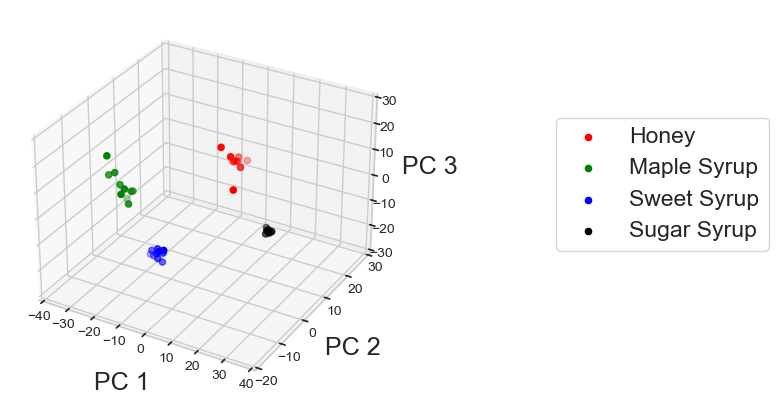

In [79]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, y1, z1, color = 'red', label = "Honey")
ax.scatter(x2, y2, z2, color = 'green', label = "Maple Syrup")
ax.scatter(x3, y3, z3, color = 'blue', label = "Sweet Syrup")
ax.scatter(x4, y4, z4, color = 'black', label = "Sugar Syrup")


plt.legend(bbox_to_anchor=(2, 0.75))


ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')


ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.zaxis.set_tick_params(labelsize=12)


ax.tick_params(axis='x', which='major', pad=-3)
ax.tick_params(axis='y', which='major', pad=-3)
ax.tick_params(axis='z', which='major', pad=-3)

ax.set_xlim3d(-40,40)
ax.set_ylim3d(-20,30)
ax.set_zlim3d(-30, 30)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.savefig("PCA_3D.png", dpi = 300, bbox_inches='tight')
plt.savefig("PCA_3D.svg", format='svg', dpi = 300, bbox_inches='tight')